# Plot the Graph for the total number of issues with different labels created and closed on every date on GitHub for SPM587SP19 issues project

### Example of Issue Form Filled out

### Data Set File:  SPM587SP19issues.json

In [238]:
import os

#import cPickle as pickle

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

from fbprophet import Prophet

%matplotlib inline



# Requirement : Get the total number of issues with different labels for every date and plot them in a stacked chart

In [239]:
# Read the JSON file into a list of dictionaries

import json
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19issues.json')]

In [240]:
# Create the DataFrame object for the list_of_issues_dict_data object

issues_df = DataFrame(list_of_issues_dict_data)

In [241]:
# Sanity test: print first 10 rows in our DataFrame

issues_df
    

,Author,State,closed_at,created_at,issue_number,labels
0,TSP19SCM781,open,None,2019-04-21,494,"[Category:Enhancement, DetectionPhase:Testing,..."
1,TSP19SCM781,open,None,2019-04-21,493,"[Category:Enhancement, DetectionPhase:Design, ..."
2,TSP19SCM781,open,None,2019-04-21,492,"[Category:Inquiry, DetectionPhase:Design, Orig..."
3,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati..."
4,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat..."
5,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ..."
6,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina..."
7,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig..."
8,SSP19SCM781,open,None,2019-04-20,486,"[Category:Enhancement, DetectionPhase:Design, ..."
9,SSP19SCM781,open,None,2019-04-20,485,"[Category:Enhancement, DetectionPhase:Field, O..."


In [242]:
# Prepare and Clean the dataframe object

wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN


In [243]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status
0,TSP19SCM781,open,None,2019-04-21,494,"[Category:Enhancement, DetectionPhase:Testing,...",NaN,NaN,NaN,NaN,NaN
1,TSP19SCM781,open,None,2019-04-21,493,"[Category:Enhancement, DetectionPhase:Design, ...",NaN,NaN,NaN,NaN,NaN
2,TSP19SCM781,open,None,2019-04-21,492,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN
3,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati...",NaN,NaN,NaN,NaN,NaN
4,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat...",NaN,NaN,NaN,NaN,NaN
5,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ...",NaN,NaN,NaN,NaN,NaN
6,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina...",NaN,NaN,NaN,NaN,NaN
7,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig...",NaN,NaN,NaN,NaN,NaN
8,SSP19SCM781,open,None,2019-04-20,486,"[Category:Enhancement, DetectionPhase:Design, ...",NaN,NaN,NaN,NaN,NaN
9,SSP19SCM781,open,None,2019-04-20,485,"[Category:Enhancement, DetectionPhase:Field, O...",NaN,NaN,NaN,NaN,NaN


In [244]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

In [245]:
wrangled_issues_df

,Author,State,closed_at,created_at,issue_number,labels,OriginationPhase,DetectionPhase,Category,Priority,Status,Address,OritinationPhase,Latitude,Longitude,Detection,Origination
0,TSP19SCM781,open,None,2019-04-21,494,"[Category:Enhancement, DetectionPhase:Testing,...",Field,Testing,Enhancement,Critical,Completed,NaN,NaN,NaN,NaN,NaN,NaN
1,TSP19SCM781,open,None,2019-04-21,493,"[Category:Enhancement, DetectionPhase:Design, ...",Design,Design,Enhancement,Major,Completed,NaN,NaN,NaN,NaN,NaN,NaN
2,TSP19SCM781,open,None,2019-04-21,492,"[Category:Inquiry, DetectionPhase:Design, Orig...",Requirements,Design,Inquiry,Major,inProgress,NaN,NaN,NaN,NaN,NaN,NaN
3,DSP19SCM782,open,None,2019-04-21,491,"[Category:Bug, DetectionPhase:Field, Originati...",Field,Field,Bug,Major,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
4,DSP19SCM782,open,None,2019-04-21,490,"[Category:Bug, DetectionPhase:Design, Originat...",Testing,Design,Bug,High,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
5,DSP19SCM781,open,None,2019-04-21,489,"[Category:Enhancement, DetectionPhase:Coding, ...",Requirements,Coding,Enhancement,Low,Completed,NaN,NaN,NaN,NaN,NaN,NaN
6,DSP19SCM781,open,None,2019-04-21,488,"[Category:Bug, DetectionPhase:Testing, Origina...",Field,Testing,Bug,Low,Rejected,NaN,NaN,NaN,NaN,NaN,NaN
7,DSP19SCM781,open,None,2019-04-21,487,"[Category:Inquiry, DetectionPhase:Design, Orig...",Documentation,Design,Inquiry,Major,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
8,SSP19SCM781,open,None,2019-04-20,486,"[Category:Enhancement, DetectionPhase:Design, ...",Testing,Design,Enhancement,Medium,pendingReview,NaN,NaN,NaN,NaN,NaN,NaN
9,SSP19SCM781,open,None,2019-04-20,485,"[Category:Enhancement, DetectionPhase:Field, O...",Testing,Field,Enhancement,Critical,Approved,NaN,NaN,NaN,NaN,NaN,NaN


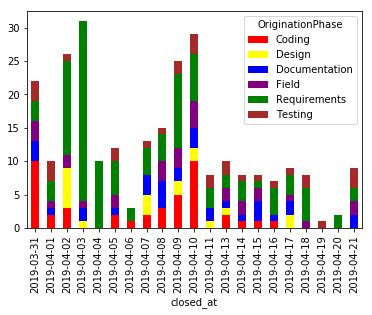

In [246]:
# Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).closed_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green','brown'], grid=False)

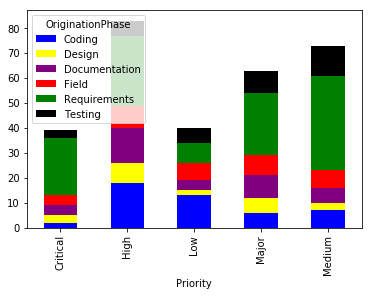

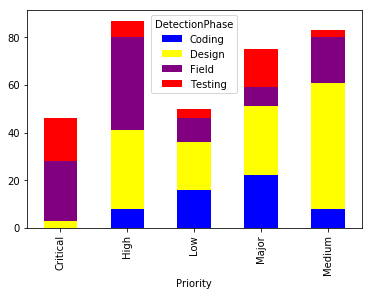

In [247]:
# Requirement #2: Plot in Bar Chart the total number of issues created for every Phase based on thier priorites
phases = ['OriginationPhase','DetectionPhase']
for phase in phases:
    LabelsReviewedByDate = wrangled_issues_df.groupby(['Priority', phase]).Priority.count()
    dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple', 'red', 'green','black'], grid=False)


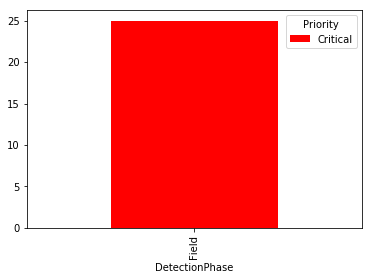

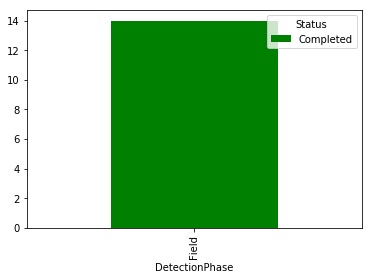

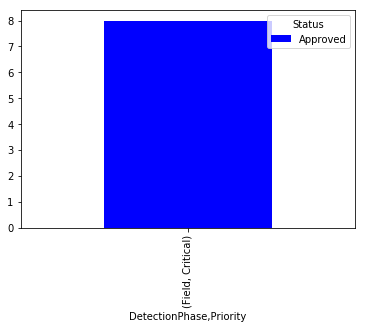

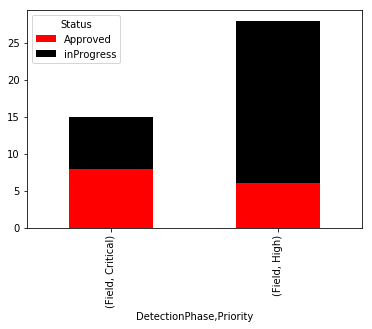

In [248]:
# Requirement #3: Plot in Bar Chart the total number of issues for
#(1) DetectionPhase is Field AND Priority is Critical
Filter1 = wrangled_issues_df[(wrangled_issues_df.DetectionPhase == "Field") & (wrangled_issues_df.Priority == "Critical")]
LabelsReviewedByDate = Filter1.groupby(['DetectionPhase','Priority']).issue_number.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red'], grid=False)

#(2) DetectionPhase is Field AND Status is Completed
Filter2 = wrangled_issues_df[(wrangled_issues_df.DetectionPhase == "Field") & (wrangled_issues_df.Status == "Completed")]
LabelsReviewedByDate = Filter2.groupby(['DetectionPhase','Status']).issue_number.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['green'], grid=False)


#(3) DetectionPhase is Field AND Priority is Critical AND Status is Approved
Filter3 = wrangled_issues_df[(wrangled_issues_df.DetectionPhase == "Field") 
                             & (wrangled_issues_df.Priority == "Critical") 
                             & (wrangled_issues_df.Status == "Approved")]
LabelsReviewedByDate = Filter3.groupby(['DetectionPhase','Priority','Status']).issue_number.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['blue'], grid=False)

#(4) DetectionPhase is Field AND Priority is Critical or High AND Status is Approved or inProgress
Filter4 = wrangled_issues_df[(wrangled_issues_df.DetectionPhase == "Field") 
                             & ((wrangled_issues_df.Priority == "Critical") | (wrangled_issues_df.Priority == "High")) 
                             & ((wrangled_issues_df.Status == "Approved") | (wrangled_issues_df.Status == "inProgress"))]
LabelsReviewedByDate = Filter4.groupby(['DetectionPhase','Priority','Status']).issue_number.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'black'], grid=False)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.


           ds       yhat  yhat_lower  yhat_upper
32 2019-05-01  32.325870   17.466048   47.221873
31 2019-04-30  31.164326   15.853896   45.473751
25 2019-04-24  30.104095   15.514386   44.530083
24 2019-04-23  28.942551   14.106841   43.280864
19 2019-04-17  27.882319   12.366523   41.690679
18 2019-04-16  26.720776   11.607318   41.939140
13 2019-04-10  25.660544   10.035097   40.569619
12 2019-04-09  24.499000    9.541180   39.571211
6  2019-04-03  23.438769    7.774240   37.348602
5  2019-04-02  22.276674    7.927980   37.197397


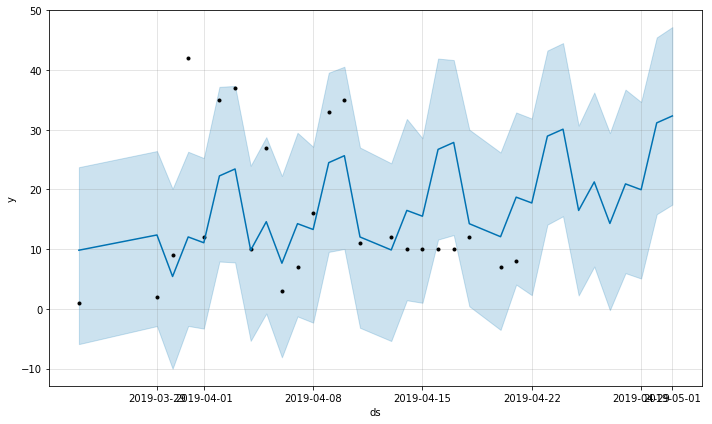

In [249]:
#fbProphet forecast: 
#1. The day of the week maximum number of issues created
df = wrangled_issues_df.created_at.value_counts().rename_axis('ds').reset_index(name = 'y')

m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=10)

forecast = m.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].sort_values('yhat',ascending = False).head(10))

fig1 = m.plot(forecast)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.0.


           ds       yhat  yhat_lower  yhat_upper
3  2019-04-03  30.284219   22.878361   37.779145
2  2019-04-02  26.694080   19.494129   34.305333
10 2019-04-10  24.570334   16.656924   32.373712
9  2019-04-09  20.980195   13.616594   28.472885
0  2019-03-31  20.634113   13.691058   28.171290
16 2019-04-17  18.856449   11.198188   26.230196
1  2019-04-01  17.013956    9.419664   24.713179
4  2019-04-04  16.183789    8.025718   23.627005
15 2019-04-16  15.266310    7.219473   22.575277
7  2019-04-07  14.920228    7.601753   22.665581


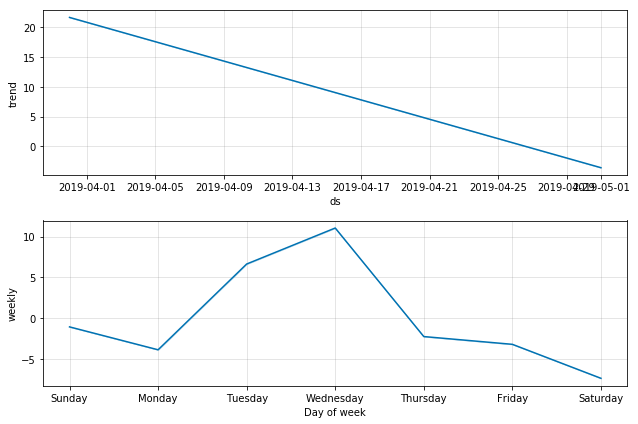

In [250]:
#2. The day of the week maximum number of issues closed

df2 = issues_df.closed_at.value_counts().rename_axis('ds').reset_index(name = 'y')

m2 = Prophet(changepoint_prior_scale=0.01).fit(df2)

future2 = m2.make_future_dataframe(periods=10)

forecast2 = m2.predict(future2)
print(forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].sort_values('yhat',ascending = False).head(10))

fig2 = m2.plot_components(forecast2)

In [251]:
#3.Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.
#4.Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays,you’ll see those here,too.
# PS: THESE HAS BEEN DONE IN THE LINES ABOVE.



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.0.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.0.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 4.0.


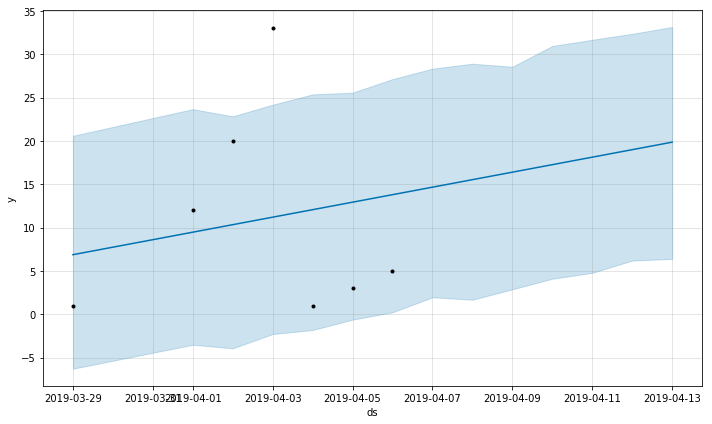

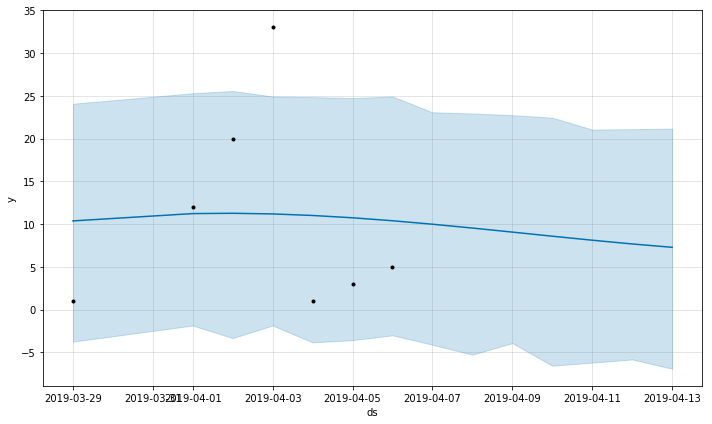

In [252]:
#5. Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
df5 = pd.read_csv('commits.csv')
df5.columns = ['Number','Author','Commit_at','Commit']
df5 = df5[df5['Commit'].str.contains('pull')]

df5 = df5.Commit_at.value_counts().rename_axis('ds').reset_index(name = 'y')
m1 = Prophet(yearly_seasonality=True)
m2 = Prophet(weekly_seasonality=True)
m = Prophet()
m.fit(df5)
m2.fit(df5)
m1.fit(df5)

future = m.make_future_dataframe(periods = 7)

forecast = m.predict(future)
forecast2 = m2.predict(future)
forecast3 = m1.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].sort_values('yhat', ascending = False)

figl = m.plot(forecast)
fig3 = m1.plot(forecast3)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 6.0.


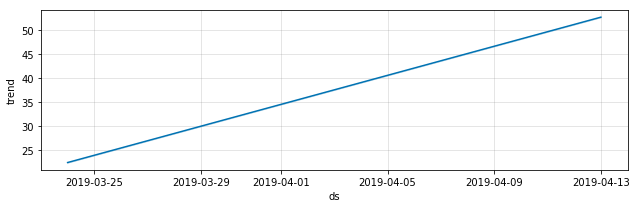

In [253]:
#6. Plot the commits forecast; use the Prophet.plot_components method. By default you’ll
#see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays,
#you’ll see those here, too.

df6 = pd.read_csv('commits.csv')
df6.columns = ['Number','Author','Commit_at','Commit']
df6 = df6.Commit_at.value_counts().rename_axis('ds').reset_index(name = 'y')
m6 = Prophet()
m6.fit(df6)

future6 = m6.make_future_dataframe(periods = 7)

forecast6 = m6.predict(future6)

forecast6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].sort_values('yhat', ascending = False)
fig6 = m6.plot_components(forecast6)

In [254]:
#TensorFlow: 
#requirement 1

from collections import defaultdict 

df=list_of_issues_dict_data
dic_count_open=defaultdict(int)
dic_count_close=defaultdict(int)
dic_count_pull=defaultdict(int)
dic_count_comment=defaultdict(int)
newdf_open_list=[]
newdf_close_list=[]
newdf_pull_list=[]
newdf_comment_list=[]
for item in range(len(df)):        
    dic_count_open[df[item]["created_at"]]+=1
    if df[item]["State"]=="open":
        dic_count_pull[df[item]["created_at"]]+=1   
    dic_count_comment[df[item]["created_at"]]+=1
    if df[item]["State"]=="closed":
        dic_count_close[df[item]["created_at"]]+=1      
for Okey,Ovalue in dic_count_open.items():
    dic_temp_open={}
    dic_temp_open["ds"]=Okey
    dic_temp_open["y"]=Ovalue
    newdf_open_list.append(dic_temp_open)
for Ckey,Cvalue in dic_count_close.items():
    dic_temp_close={}
    dic_temp_close["ds"]=Ckey
    dic_temp_close["y"]=Cvalue
    newdf_close_list.append(dic_temp_close) 
for Pkey,Pvalue in dic_count_close.items():
    dic_temp_pull={}
    dic_temp_pull["ds"]=Pkey
    dic_temp_pull["y"]=Pvalue
    newdf_pull_list.append(dic_temp_pull)
for Cokey,Covalue in dic_count_comment.items():
    dic_temp_comment={}
    dic_temp_comment["ds"]=Cokey
    dic_temp_comment["y"]=Covalue
    newdf_comment_list.append(dic_temp_comment)        
    
newdf_open=DataFrame(newdf_open_list) 
newdf_close=DataFrame(newdf_close_list)
newdf_pull=DataFrame(newdf_pull_list)
newdf_comment=DataFrame(newdf_comment_list)





In [255]:
#Requirement 2


In [256]:
#Requirement 3


In [257]:
#Requirement 4


In [258]:
#Requirement 5
op1=Prophet()
op1.fit(newdf_open)
open_future1 = op1.make_future_dataframe(periods=7)
open_forecast1 = op1.predict(open_future1)
open_forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.


,ds,yhat,yhat_lower,yhat_upper
0,2019-03-24,9.822503,-4.605483,24.783003
1,2019-03-29,12.377400,-2.991991,27.654269
2,2019-03-30,5.419221,-9.346091,19.635081
3,2019-03-31,12.048135,-3.336099,25.903733
4,2019-04-01,11.074410,-3.917501,26.469506
5,2019-04-02,22.276674,6.061626,37.011879
6,2019-04-03,23.438769,9.509514,39.358634
7,2019-04-04,9.820206,-4.612250,24.725400
8,2019-04-05,14.601930,-0.578898,29.022645
9,2019-04-06,7.643201,-7.657338,22.437128


In [259]:
#Requirement 6
close1=Prophet()
close1.fit(newdf_close)
close1_future = close1.make_future_dataframe(periods=7)
close1_forecast = close1.predict(close1_future)
close1_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 16.0.


,ds,yhat,yhat_lower,yhat_upper
0,2019-03-24,13.140945,-2.415465,28.568779
1,2019-03-29,12.824848,-2.182514,27.050191
2,2019-03-30,4.097341,-10.887524,19.057076
3,2019-03-31,13.723484,-1.276509,28.039141
4,2019-04-01,11.198419,-4.887463,25.841180
5,2019-04-02,21.775640,6.530194,38.344347
6,2019-04-03,22.970363,7.103058,38.997196
7,2019-04-04,6.338439,-9.596855,21.036023
8,2019-04-05,13.407387,-1.690766,29.372515
9,2019-04-06,4.679880,-10.635382,19.897663


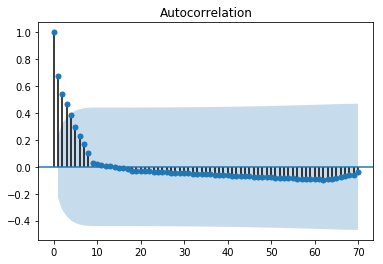

In [260]:
#StatsModel
from __future__ import print_function
import statsmodels as sm
from patsy import dmatrices
import tensorflow as tf
from pandas import read_csv

path = 'SPM587SP19issues.json'
df = pd.read_json(path, lines='True')
df.to_csv('SPM587SP19issues.csv')

fig1 = sm.graphics.tsaplots.plot_acf(df.Author.value_counts())

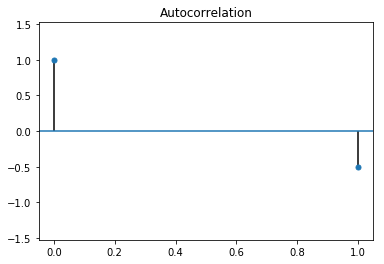

In [261]:
#Requirement 2

fig2 = sm.graphics.tsaplots.plot_acf(df['State'].value_counts())

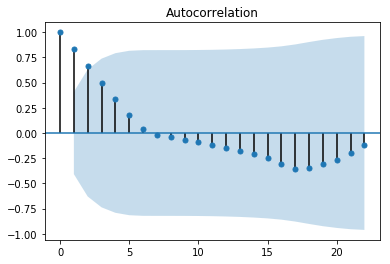

In [262]:
#Requirement 3



fig3 = sm.graphics.tsaplots.plot_acf(df['created_at'].value_counts())

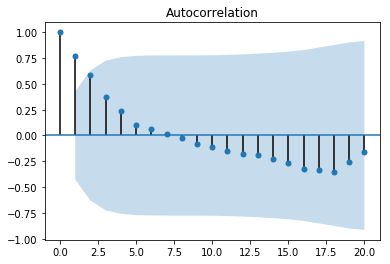

In [263]:
#Requirement 4

fig4 = sm.graphics.tsaplots.plot_acf(df['closed_at'].value_counts())

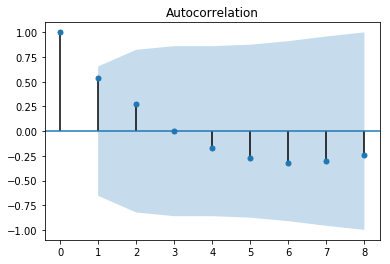

In [264]:
#Requirement 6
df6 = pd.read_csv('commits.csv')
df6.columns = ['Number','Author','Commit_at','Commit']
fig6 = sm.graphics.tsaplots.plot_acf(df6['Commit_at'].value_counts())